# 3/4 Report

<!--Problem description-->
## Introduction of the problem
<!-- TO DO: refine paragraph, add stuff-->
<!-- [Decisions to be impacted], [Business value], [Why do you care about this project?]-->
We all know that movie industry is risky, but it can also bring enormous profit at the same time. That's why countless companies and people have been attracted to this industry. However, how risky is it? We all know super hits like Titanic, and we all have seen big productions fail. There hasn't been an universal formula to make a popular movie, but we are still interested in how to choose the right movie to invest in.  

In this analysis, we aim to produce a study to figure out specific reasons that lead to the success of a movie economically, and give advices for companies or individuals who want to enter this industry. In other words, we decided to explore how to select a movie that will be successful economically to invest in for companies and individuls who want to make a profit in this field.

<!--Introduction of the dataset-->
## Introduction of the dataset
<!-- TO DO: more description of data -->
For the first half semester, I have been using "The Movies Dataset" on Kaggle (https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv). These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. 

However, this dataset consists of large amount of missing entires for budget and revenue. There were only around 6000 entries with both of these features, and a large amount of data with problem, new data was chosen for the study.

### New Dataset
The new dataset was gathered from The Numbers (https://www.the-numbers.com/), a website operated by Nash Information Services, LLC., consisting of detailed information (especially on the business aspect) about various movies. Code to get and assemble the dataset were recorded in file "scraping budget and revenue", "scraping info" and "Scraping more" in the github repository (https://github.com/kongwei981126/Movie-Industry/tree/Wei)

### Overview on the dataset

In [34]:
#Preparations
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import re
import warnings


#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format',  '{:,.2f}'.format)
pd.set_option('display.precision', 2)

#import the dataset
df = pd.read_csv('metadata.csv', low_memory=False, thousands=',')
df.head(3)

,moviename,Budget,link,Domestic Box Office,International Box Office,Worldwide Box Office,Domestic Release,Dom Year,International Release,Int Year,Rating,Runtime,Franchise,Keywords,Genre,Production Method,Creative Type,Production/Financing Companies,Production Country,Languages,Leading Cast,Supporting Cast,Production and Technical Credits,Director,Est. Domestic DVD Sales,Est. Domestic Blu-ray Sales,Total Est. Domestic Video Sales,Lead Ensemble Members,Cameos,Uncategorized Crew,Narrator(s),Extras,Documentary Subject(s),Interviewee(s)
0,The Super Mario Bros. Movie,100000000,Super-Mario-Bros-Movie-The-(2022)#tab=summary,"260,823,700.00","248,398,143.00","509,221,843.00","April 5th, 2023","2,023.00","April 4th, 2023","2,023.00",PG,92.00,NaN,"['Ensemble', 'Prince/Princess', 'Royalty', 'Go...",Action,Digital Animation,Kids Fiction,"['Universal Pictures', 'Nintendo', 'Illuminati...","['Japan', 'United States']",['English'],"['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Da...","['Keegan-Michael Key', 'Seth Rogen', 'Fred Arm...","['Aaron Horvath', 'Michael Jelenic', 'Matthew ...","['Aaron Horvath', 'Michael Jelenic']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Harry Potter and the Chamber of Secrets,100000000,Harry-Potter-and-the-Chamber-of-Secrets#tab=su...,"262,233,381.00","612,721,149.00","874,954,530.00","November 15th, 2002","2,002.00","November 15th, 2002","2,002.00",PG,161.00,['Harry Potter'],"['Boarding School', 'IMAX: DMR']",Adventure,Animation/Live Action,Fantasy,"['Warner Bros.', 'Heyday Films', '1492 Pictures']","['United Kingdom', 'United States']",['English'],"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...","['Robbie Coltrane', 'Richard Griffiths', 'Rich...","['Chris Columbus', 'Steve Kloves', 'J.K. Rowli...",['Chris Columbus'],NaN,NaN,NaN,NaN,['John Cleese'],NaN,NaN,NaN,NaN,NaN
2,Rudderless,5000000,Rudderless#tab=summary,"56,001.00","528,498.00","584,499.00","October 17th, 2014","2,014.00","December 21st, 2016","2,016.00",R,105.00,NaN,"['Death of a Son or Daughter', 'Singers', 'Mus...",Drama,Live Action,Contemporary Fiction,"['Unified Pictures', 'Dog Pond']",['United States'],['English'],"['Billy Crudup', 'Anton Yelchin']","['Felicity Huffman', 'Jamie Chung', 'Selena Go...","['William H. Macy', 'Casey Twenter', 'Jeff Rob...",['William H. Macy'],"368,261.00",NaN,"368,261.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#some more information
print('Rows: ' + str(df.shape[0]))
print('Colums: ' + str(df.shape[1]))
print('---------Info of dataset--------------')
print(df.info())
print('---------Number of missing values----------')
print(df.isnull().sum())

Rows: 6382
Colums: 34
---------Info of dataset--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6382 entries, 0 to 6381
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   moviename                         6382 non-null   object 
 1   Budget                            6382 non-null   int64  
 2   link                              6382 non-null   object 
 3   Domestic Box Office               6053 non-null   float64
 4   International Box Office          4533 non-null   float64
 5   Worldwide Box Office              4819 non-null   float64
 6   Domestic Release                  5967 non-null   object 
 7   Dom Year                          5967 non-null   float64
 8   International Release             2942 non-null   object 
 9   Int Year                          2942 non-null   float64
 10  Rating                            5983 non-null   object 
 11  Runtime 

### Data Processing
<!-- TO DO: Discuss why subsetting instead of imputing, discuss why this should make sense-->
For the sake of this project, in order to compare movies from different origins, we will be using Worldwide Box Office (or refered as Revenue in later of this report) and Budget to measure the economic success of movies. This has the following benefits:
- Most movies have both of these listed
- This would allow comparing movies from different origins.

To further this, an ROI measure was added to the dataset in order to compare the return of movies with different budget and from different country and time. ROI is calculated by the dividing the total earnings by the cost, and times 100 percent. 

In [20]:
# Fix some entires
df['Domestic Box Office'] = df['Domestic Box Office'].fillna(0)
df['International Box Office'] = df['International Box Office'].fillna(0)
df['Worldwide Box Office'] = df['Worldwide Box Office'].fillna(0)

df['Revenue'] = np.maximum(df['Domestic Box Office'] + df['International Box Office'], df['Worldwide Box Office'])

In [100]:
for index, row in df.iterrows():
    if pd.isna(row['Leading Cast']):
        df.at[index, 'Leading Cast'] = df.at[index, 'Lead Ensemble Members']

In [23]:
# Subsetting rows with both Budget and Revenue
df_sub = df.loc[(df['Revenue'] != 0) & (df['Budget'] != 0)].copy()

In [25]:
# Compute ROI
df_sub['ROI'] = (df_sub['Revenue']-df_sub['Budget'])/df_sub['Budget']*100

## Feature selection and Engineering
First, Remove useless column that was introduced due to the process of data collecting: link. Also remove other features about revenue since we have already processed it into Revenue and ROI for our analysis.

Then, look into the other features one by one and dump the ones that don't provide much information. 

### Release time

In our dataset, there are Domestic Release date, and International Release. For this analysis, I will use which ever is earilier as the release time for a movie. And I will keep two colums: Year and Month in order to analyze general yearly trend and possible seasonal effect.

In [61]:
mon = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dom_rel_month = pd.Series([])
for index, row in df_sub['Domestic Release'].to_frame().iterrows():
    d = ""
    if not pd.isna(row[0]):
        d = re.findall(r"([a-zA-Z]+)", row[0])
        if d != [] and d[0] in mon:
            t = d[0]
        else:
            t = np.nan
    else: 
        t = np.nan
    with warnings.catch_warnings():
        warnings.simplefilter(action = 'ignore', category = FutureWarning)
        dom_rel_month = dom_rel_month.append(pd.Series(data = t))

C:\Users\kongw\AppData\Local\Temp\ipykernel_3844\3740225237.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dom_rel_month = pd.Series([])


In [62]:
int_rel_month = pd.Series([])
for index, row in df_sub['International Release'].to_frame().iterrows():
    d = ""
    if not pd.isna(row[0]):
        d = re.findall(r"([a-zA-Z]+)", row[0])
        if d != [] and d[0] in mon:
            t = d[0]
        else:
            t = np.nan
    else: 
        t = np.nan
    with warnings.catch_warnings():
        warnings.simplefilter(action = 'ignore', category = FutureWarning)
        int_rel_month = int_rel_month.append(pd.Series(data = t))

C:\Users\kongw\AppData\Local\Temp\ipykernel_3844\3402644605.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  int_rel_month = pd.Series([])


In [63]:
df_sub['int_rel_month'] = int_rel_month.to_list()
df_sub['dom_rel_month'] = dom_rel_month.to_list()
df_sub['Year'] = ''
df_sub['Month'] = ''

In [71]:
from datetime import datetime

for index, row in df_sub.iterrows():
    if pd.isna(row['Dom Year']):
        df_sub.at[index, 'Year'] = row['Int Year']
        df_sub.at[index, 'Month'] = row['int_rel_month']
    else: 
        # dom year not na
        if pd.isna(row['Int Year']):
            df_sub.at[index, 'Year'] = row['Dom Year']
            df_sub.at[index, 'Month'] = row['dom_rel_month']
        else:
            #both year not na
            if row['Dom Year'] == row['Int Year']:
                df_sub.at[index, 'Year'] = row['Dom Year']
                # month
                if pd.isna(row['int_rel_month']):
                    df_sub.at[index, 'Month'] = row['dom_rel_month']
                elif pd.isna(row['dom_rel_month']):
                    df_sub.at[index, 'Month'] = row['int_rel_month']
                else:
                    #compare month
                    i = datetime.strptime(row['int_rel_month'], '%B').month
                    d = datetime.strptime(row['dom_rel_month'], '%B').month
                    if i <= d:
                        df_sub.at[index, 'Month'] = row['int_rel_month']
                    else:
                        df_sub.at[index, 'Month'] = row['dom_rel_month']
            elif row['Dom Year'] < row['Int Year']:
                df_sub.at[index, 'Year'] = row['Dom Year']
                df_sub.at[index, 'Month'] = row['dom_rel_month']
            else: 
                df_sub.at[index, 'Year'] = row['Int Year']
                df_sub.at[index, 'Month'] = row['int_rel_month']

### Rating
Some classes contains little data, but still might have useful information

In [82]:
df_sub['Rating'].value_counts()

R            2520
PG-13        1821
PG            833
Not Rated     422
G             141
NC-17          13
M/PG            3
Open            2
GP              2
Name: Rating, dtype: int64

### Genre

In [83]:
df_sub['Genre'].value_counts()

Drama                  1617
Comedy                  982
Action                  785
Adventure               728
Thriller/Suspense       607
Horror                  496
Romantic Comedy         263
Black Comedy            125
Documentary             120
Musical                 106
Western                  77
Concert/Performance      14
Multiple Genres           2
Name: Genre, dtype: int64

### Production Method

In [84]:
df_sub['Production Method'].value_counts()

Live Action                    5421
Digital Animation               218
Animation/Live Action           177
Hand Animation                   78
Stop-Motion Animation            15
Rotoscoping                       2
Multiple Production Methods       2
Name: Production Method, dtype: int64

### Creative Type

In [85]:
df_sub['Creative Type'].value_counts()

Contemporary Fiction       3049
Historical Fiction          689
Dramatization               528
Science Fiction             517
Fantasy                     396
Kids Fiction                365
Factual                     133
Super Hero                  120
Multiple Creative Types       7
Name: Creative Type, dtype: int64

### Production Country

Feature left out due to most movies produced in United States or partially in United States.

In [94]:
df_sub['Production Country'].value_counts().head()

['United States']                      4103
['United Kingdom']                      199
['United Kingdom', 'United States']     176
['France']                               94
['Canada', 'United States']              55
Name: Production Country, dtype: int64

### Languages

Similarly to Country, Languages were not used

In [97]:
df_sub['Languages'].value_counts().head()

['English']               4377
['French']                  69
['English', 'Spanish']      64
['English', 'French']       44
['Spanish']                 33
Name: Languages, dtype: int64

### Other Features

Features including Supporting Cast, Production and Technical Credits, DVD Sales, Ensemble members, Cameos, Uncategorized Crew, Narrators, Extras, Documentary Subject, Interviewees were all removed due to lack of useful entries.

### Creating some new features

In [109]:
df_sub['is_Franchise'] = np.where(pd.isna(df_sub['Franchise']), False, True)

In [241]:
dataset = df_sub[['moviename', 'Budget', 'Revenue', 'ROI', 'Year', 'Month',
            'Rating', 'Franchise', 'is_Franchise', 'Keywords', 'Genre', 'Production Method',
            'Creative Type', 'Production/Financing Companies', 'Leading Cast', 'Director']].copy()
dataset = dataset[~dataset['Year'].isna()]
dataset.head(2)

,moviename,Budget,Revenue,ROI,Year,Month,Rating,Franchise,is_Franchise,Keywords,Genre,Production Method,Creative Type,Production/Financing Companies,Leading Cast,Director
0,The Super Mario Bros. Movie,100000000,"509,221,843.00",409.22,"2,023.00",April,PG,NaN,False,"['Ensemble', 'Prince/Princess', 'Royalty', 'Go...",Action,Digital Animation,Kids Fiction,"['Universal Pictures', 'Nintendo', 'Illuminati...","['Chris Pratt', 'Anya Taylor-Joy', 'Charlie Da...","['Aaron Horvath', 'Michael Jelenic']"
1,Harry Potter and the Chamber of Secrets,100000000,"874,954,530.00",774.95,"2,002.00",November,PG,['Harry Potter'],True,"['Boarding School', 'IMAX: DMR']",Adventure,Animation/Live Action,Fantasy,"['Warner Bros.', 'Heyday Films', '1492 Pictures']","['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...",['Chris Columbus']


### Outliers
Here we will be using only ROI in outlier detection, since it is one of our only numerical features, and all other numerical features were used in calculating ROI.

In [180]:
dataset['ROI'].describe()

count     5,946.00
mean        395.98
std       2,916.87
min        -100.00
25%         -33.14
50%          86.08
75%         295.54
max     179,900.00
Name: ROI, dtype: float64

In [187]:
dataset.sort_values(by = ['ROI']).head(5)

,moviename,Budget,Revenue,ROI,Year,Month,Rating,Franchise,is_Franchise,Keywords,Genre,Production Method,Creative Type,Production/Financing Companies,Leading Cast,Director
5892,Kirikou Et Les Hommes Et Les Femmes,7500000,17.00,-100.00,"2,015.00",July,NaN,['Kirikou'],True,NaN,Adventure,Digital Animation,Kids Fiction,NaN,NaN,['Michel Ocelot']
16,Capricorn One,5000000,401.00,-99.99,"1,977.00",December,PG,NaN,False,NaN,Action,Live Action,Science Fiction,NaN,NaN,['Peter Hyams']
4990,Pandaemonium,15000000,"1,438.00",-99.99,"2,001.00",June,PG-13,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,['Julien Temple']
6012,Perrier’s Bounty,6600000,828.00,-99.99,"2,010.00",May,R,NaN,False,NaN,NaN,NaN,NaN,NaN,"['Cillian Murphy', 'Jodie Whittaker', 'Jim Bro...",['Ian Fitzgibbon']
5720,Skin Trade,9000000,"1,242.00",-99.99,"2,015.00",May,R,NaN,False,['Early / Simultaneous Video-on-Demand release...,Action,Live Action,Contemporary Fiction,"['SC Films Thailand', 'Thor Pictures', 'BMP']",NaN,['Ekachai Uekrongtham']


In [188]:
dataset.sort_values(by = ['ROI']).tail(5)

,moviename,Budget,Revenue,ROI,Year,Month,Rating,Franchise,is_Franchise,Keywords,Genre,Production Method,Creative Type,Production/Financing Companies,Leading Cast,Director
1117,The Blair Witch Project,600000,"248,300,000.00","41,283.33","1,999.00",July,R,['Blair Witch Project'],True,"['Found Footage', 'Found footage horror']",Horror,Live Action,Contemporary Fiction,NaN,"['Heather Donahue', 'Joshua Leonard', 'Michael...","['Daniel Myrick', 'Eduardo Sanchez']"
1409,The Gallows,100000,"41,656,474.00","41,556.47","2,015.00",July,R,NaN,False,"['Theater Actor', 'Accidental Death', 'Found F...",Horror,Live Action,Fantasy,"['New Line Cinema', 'Blumhouse', 'Tremendum Pi...",['Cassidy Gifford'],"['Travis Cluff', 'Chris Lofing']"
1207,Paranormal Activity,450000,"194,183,034.00","43,051.79","2,009.00",September,R,['Paranormal Activity'],True,"['Found Footage', 'Exorcism', 'Guerilla Filmma...",Horror,Live Action,Fantasy,"['Blumhouse', 'Solana Films']","['Micah Sloat', 'Katie Featherston']",['Oren Peli']
1342,Mad Max,200000,"99,750,000.00","49,775.00","1,979.00",April,NaN,['Mad Max'],True,"['Post Apocalypse', 'Revenge', 'Vigilante', 'G...",Action,Live Action,Science Fiction,['Roadshow Films'],['Mel Gibson'],['George Miller']
1486,Deep Throat,25000,"45,000,000.00","179,900.00","1,972.00",June,NC-17,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
dataset.sort_values(by = ['ROI']).tail(5)

,moviename,Budget,Revenue,ROI,Year,Month,Rating,Franchise,is_Franchise,Keywords,Genre,Production Method,Creative Type,Production/Financing Companies,Leading Cast,Director
1117,The Blair Witch Project,600000,"248,300,000.00","41,283.33","1,999.00",July,R,['Blair Witch Project'],True,"['Found Footage', 'Found footage horror']",Horror,Live Action,Contemporary Fiction,NaN,"['Heather Donahue', 'Joshua Leonard', 'Michael...","['Daniel Myrick', 'Eduardo Sanchez']"
1409,The Gallows,100000,"41,656,474.00","41,556.47","2,015.00",July,R,NaN,False,"['Theater Actor', 'Accidental Death', 'Found F...",Horror,Live Action,Fantasy,"['New Line Cinema', 'Blumhouse', 'Tremendum Pi...",['Cassidy Gifford'],"['Travis Cluff', 'Chris Lofing']"
1207,Paranormal Activity,450000,"194,183,034.00","43,051.79","2,009.00",September,R,['Paranormal Activity'],True,"['Found Footage', 'Exorcism', 'Guerilla Filmma...",Horror,Live Action,Fantasy,"['Blumhouse', 'Solana Films']","['Micah Sloat', 'Katie Featherston']",['Oren Peli']
1342,Mad Max,200000,"99,750,000.00","49,775.00","1,979.00",April,NaN,['Mad Max'],True,"['Post Apocalypse', 'Revenge', 'Vigilante', 'G...",Action,Live Action,Science Fiction,['Roadshow Films'],['Mel Gibson'],['George Miller']
1486,Deep Throat,25000,"45,000,000.00","179,900.00","1,972.00",June,NC-17,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, we do have some strange values, both with super large and small ROI. That being said, I decided to fact check the movies:
For movies with low ROI, with evidence of ROI of -95% existing, -95% is used as a cutoff. 
For moview with high ROI, the one movie "Deep Throat" with incredibly high ROI is removed.

In [193]:
dataset = dataset.loc[dataset['ROI'] < 50000]
dataset = dataset.loc[dataset['ROI'] > -95]
dataset['ROI'].describe()

count    5,571.00
mean       396.94
std      1,810.98
min        -94.97
25%        -14.53
50%        106.71
75%        320.26
max     49,775.00
Name: ROI, dtype: float64

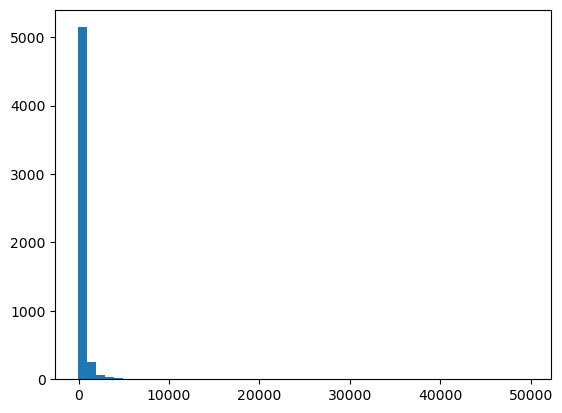

In [199]:
plt.hist(dataset['ROI'], bins = 50)
plt.show()

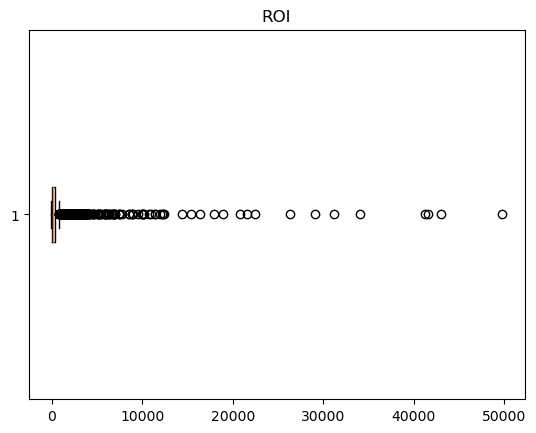

In [208]:
fig1, ax1 = plt.subplots()
ax1.set_title('ROI')
ax1.boxplot(dataset['ROI'], vert=False)
plt.show()

## Models
Since our data obviously is not normal, we will have to use non-parametric methods.


#### XGBoost


In [200]:
X = dataset[['Budget', 'Year', 'Month',
       'Rating', 'is_Franchise', 'Genre', 'Production Method',
       'Creative Type']].copy()
X["Month"] = X["Month"].astype("category")
X["Rating"] = X["Rating"].astype("category")
X["is_Franchise"] = X["is_Franchise"].astype("category")
X["Genre"] = X["Genre"].astype("category")
X["Production Method"] = X["Production Method"].astype("category")
X["Creative Type"] = X["Creative Type"].astype("category")
X["Year"] = X["Year"].astype('Int64')

In [217]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    dataset[['ROI']], test_size = .2, random_state = 10) #split the data

In [218]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4456 entries, 3356 to 1773
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Budget             4456 non-null   int64   
 1   Year               4456 non-null   Int64   
 2   Month              4438 non-null   category
 3   Rating             4280 non-null   category
 4   is_Franchise       4456 non-null   category
 5   Genre              4396 non-null   category
 6   Production Method  4389 non-null   category
 7   Creative Type      4332 non-null   category
dtypes: Int64(1), category(6), int64(1)
memory usage: 137.1 KB


In [219]:
import xgboost as xgb
clf = xgb.XGBRegressor(enable_categorical = True,  
                      tree_method = "hist")
clf.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [220]:
y_pred = clf.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.31853634862354263

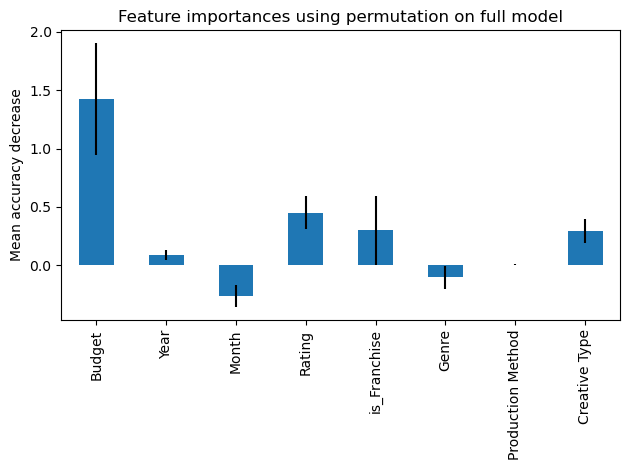

In [221]:
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=10, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index = list(X_train.columns.values))
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

As we can see, our model cannot explain anything about movies, which is what we have always heard: We know nothing. However, there are some more that we can dig into.

### Dividing up movies based on ROI

Some thoughts on this being dividing the movies based on their levels of return: Here we are doing the following:
- ROI below 0 are classified as "Loss"
- ROI below median (106.71) are "Below than average"
- ROI between above median but below 75% (320.26) are "above average"
- ROI between 75% and 1000 (around 95 percentile) are "hits"
- ROI above 1000 are "super hits"

In [243]:
dataset['hit'] = ''
for index, row in dataset.iterrows():
    if row['ROI'] <= 0:
        dataset.at[index, 'hit'] = 'Loss'
    elif row['ROI'] > 0 and row['ROI'] <= 106.71:
        dataset.at[index, 'hit'] = 'Below average'
    elif row['ROI'] > 106.71 and row['ROI'] <= 320.26:
        dataset.at[index, 'hit'] = 'Above average'
    elif row['ROI'] > 320.26 and row['ROI'] <= 1000:
        dataset.at[index, 'hit'] = 'Hits'
    elif row['ROI'] > 1000:
        dataset.at[index, 'hit'] = 'Super hits'      

In [244]:
dataset['hit'].value_counts()

Loss             1980
Above average    1393
Below average    1179
Hits             1014
Super hits        380
Name: hit, dtype: int64

### Run the model again

In [248]:
X = dataset[['Budget', 'Year', 'Month',
       'Rating', 'is_Franchise', 'Genre', 'Production Method',
       'Creative Type']].copy()
X["Month"] = X["Month"].astype("category")
X["Rating"] = X["Rating"].astype("category")
X["is_Franchise"] = X["is_Franchise"].astype("category")
X["Genre"] = X["Genre"].astype("category")
X["Production Method"] = X["Production Method"].astype("category")
X["Creative Type"] = X["Creative Type"].astype("category")
X["Year"] = X["Year"].astype('Int64')

In [249]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    dataset[['hit']], test_size = .2, random_state = 10) #split the data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train.values.ravel())

In [250]:
import xgboost as xgb
clf = xgb.XGBClassifier(enable_categorical = True,  
                      tree_method = "hist")
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [251]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.37142857142857144

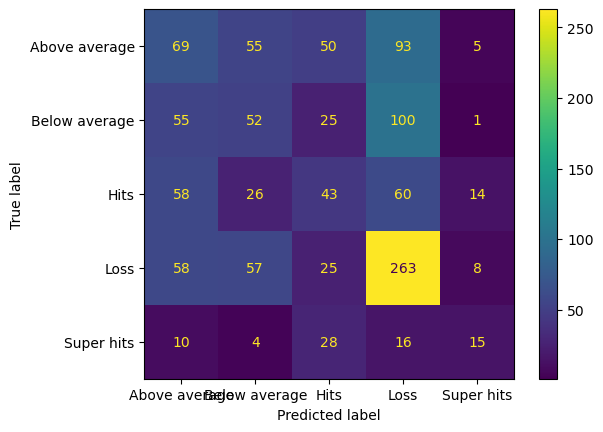

In [252]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay(cm)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = le.inverse_transform(clf.classes_))
disp.plot()
plt.show()

### Comments:

This classifier is actually doing a fine job: most of the misses were put into classes close to their true labels. 

**Need to tune the model**

### Descriptive analysis

### Looking into Casts

In [260]:
import ast
dataset['Leading Cast'] = dataset['Leading Cast'].fillna('[]').apply(ast.literal_eval)

In [261]:
cast = pd.DataFrame(columns = ['name', 'number', 'Total Budget', 'Total Revenue'])
# cast.head(1)

In [262]:
for index, row in dataset.iterrows():
    lead = row['Leading Cast']
    if lead != []:
        for name in lead:
            if name in cast['name'].values:
                rownum = np.where(cast['name'] == name)[0][0]
                cast.at[rownum, 'number'] = cast.at[rownum, 'number'] + 1
                cast.at[rownum, 'Total Budget'] = cast.at[rownum, 'Total Budget'] + row['Budget']
                cast.at[rownum, 'Total Revenue'] = cast.at[rownum, 'Total Revenue'] + row['Revenue']
            else: 
                cast.loc[len(cast)] = [name, 1, row['Budget'], row['Revenue']]

In [266]:
cast['Average Budget'] = cast['Total Budget']/cast['number']
cast['Average Revenue'] = cast['Total Revenue']/cast['number']

In [282]:
cast.sort_values(by = ['Average Revenue'], ascending = False).head(5)

,name,number,Total Budget,Total Revenue,Average Revenue,Average Budget
991,Idina Menzel,1,150000000,"1,437,862,795.00","1,437,862,795.00","150,000,000.00"
980,Zendaya,1,160000000,"1,132,107,522.00","1,132,107,522.00","160,000,000.00"
884,Nicola Peltz,1,210000000,"1,104,054,072.00","1,104,054,072.00","210,000,000.00"
855,Daisy Ridley,2,406000000,"2,091,687,986.00","1,045,843,993.00","203,000,000.00"
852,Ian McShane,1,379000000,"1,045,713,802.00","1,045,713,802.00","379,000,000.00"


Due to the fact that some actors were high with Average Revenue (and budget) since they only starred in one movie and that became a hit, we only consider actors with equal or more than 5 movies in our star rankings.

In [283]:
cast = cast.loc[cast['number'] >= 5].copy()

In [284]:
top20_ave_rev = cast.sort_values(by = ['Average Revenue'], ascending = False)['name'].head(20).reset_index(drop=True)
top20_tot_rev = cast.sort_values(by = ['Total Revenue'], ascending = False)['name'].head(20).reset_index(drop=True)
top20_ave_bud = cast.sort_values(by = ['Average Budget'], ascending = False)['name'].head(20).reset_index(drop=True)
top20_tot_bud = cast.sort_values(by = ['Total Budget'], ascending = False)['name'].head(20).reset_index(drop=True)
top20_num = cast.sort_values(by = ['number'], ascending = False)['name'].head(20).reset_index(drop=True)

In [295]:
d = pd.DataFrame({"By Number of Movies": top20_num,
                  "By Average Revenue": top20_ave_rev, 
                  "By Total Revenue": top20_tot_rev,
                 "By Average Budget": top20_ave_bud,
                 "By Total Budget": top20_tot_bud})
d.index += 1 
print("Top 20 actors in the world")
d

Top 20 actors in the world


,By Number of Movies,By Average Revenue,By Total Revenue,By Average Budget,By Total Budget
1,Robert De Niro,Sam Worthington,Tom Hanks,Orlando Bloom,Johnny Depp
2,Nicolas Cage,Zoe Saldana,Tom Cruise,Gal Gadot,Tom Cruise
3,Bruce Willis,Rupert Grint,Johnny Depp,Chris Pratt,Will Smith
4,Denzel Washington,Chris Pratt,Emma Watson,Sam Worthington,Nicolas Cage
5,Matt Damon,Emma Watson,Daniel Radcliffe,Geoffrey Rush,Matt Damon
6,Tom Cruise,Daniel Radcliffe,Leonardo DiCaprio,Zoe Saldana,Hugh Jackman
7,Samuel L. Jackson,Tom Holland,Rupert Grint,Martin Freeman,Tom Hanks
8,Liam Neeson,Ray Romano,Will Smith,Daniel Craig,Bruce Willis
9,Tom Hanks,Orlando Bloom,Sam Worthington,Rupert Grint,Liam Neeson
10,Nicole Kidman,Martin Freeman,Steve Carell,Tobey Maguire,Robert De Niro


For now, count actors in any of these lists as a star.

In [315]:
starlist = top20_num.tolist() + top20_ave_rev.tolist() + \
    top20_tot_rev.tolist() + top20_ave_bud.tolist() + top20_tot_bud.tolist()
starlist = list(set(starlist))
print("We have ", len(starlist), " stars")

We have  53  stars


In [319]:
dataset['has_star_actor'] = False
for index, row in dataset.iterrows():
    lead = row['Leading Cast']
    if lead != []:
        for name in lead:
            if name in starlist:
                dataset.at[index, 'has_star_actor'] = True
                break

In [356]:
# pd.crosstab(columns = dataset['has_star_actor'],
#             index = dataset['hit'])

In [365]:
Y = dataset.loc[dataset['has_star_actor']]['hit'].value_counts()/len(dataset.loc[dataset['has_star_actor']])
N = dataset.loc[dataset['has_star_actor'] == False]['hit'].value_counts()/len(dataset.loc[dataset['has_star_actor'] == False])

In [383]:
t = pd.concat([Y, N], axis = 1)
t.columns = ["Has Star", "No Star"]
t.loc[['Loss', 'Below average', 'Above average', 'Hits', 'Super hits']]

,Has Star,No Star
Loss,0.23,0.35
Below average,0.23,0.19
Above average,0.31,0.22
Hits,0.18,0.17
Super hits,0.05,0.07


### Comment:
Star actors do have effect on movie returns? maybe?

### Doing the same on Directors

In [433]:
dataset['Director'] = dataset['Director'].fillna('[]').apply(ast.literal_eval)

In [418]:
director = pd.DataFrame(columns = ['name', 'number', 'Total Budget', 'Total Revenue'])

In [419]:
for index, row in dataset.iterrows():
    lead = row['Director']
    if lead != []:
        for name in lead:
            if name in director['name'].values:
                rownum = np.where(director['name'] == name)[0][0]
                director.at[rownum, 'number'] = director.at[rownum, 'number'] + 1
                director.at[rownum, 'Total Budget'] = director.at[rownum, 'Total Budget'] + row['Budget']
                director.at[rownum, 'Total Revenue'] = director.at[rownum, 'Total Revenue'] + row['Revenue']
            else: 
                director.loc[len(director)] = [name, 1, row['Budget'], row['Revenue']]

In [420]:
director['Average Budget'] = director['Total Budget']/director['number']
director['Average Revenue'] = director['Total Revenue']/director['number']

In [425]:
director = director.loc[director['number'] >= 5].copy()

In [426]:
top20_ave_rev = director.sort_values(by = ['Average Revenue'], ascending = False)['name'].head(20).reset_index(drop=True)
top20_tot_rev = director.sort_values(by = ['Total Revenue'], ascending = False)['name'].head(20).reset_index(drop=True)
top20_ave_bud = director.sort_values(by = ['Average Budget'], ascending = False)['name'].head(20).reset_index(drop=True)
top20_tot_bud = director.sort_values(by = ['Total Budget'], ascending = False)['name'].head(20).reset_index(drop=True)
top20_num = director.sort_values(by = ['number'], ascending = False)['name'].head(20).reset_index(drop=True)

In [428]:
d = pd.DataFrame({"By Number of Movies": top20_num,
                  "By Average Revenue": top20_ave_rev, 
                  "By Total Revenue": top20_tot_rev,
                 "By Average Budget": top20_ave_bud,
                 "By Total Budget": top20_tot_bud})
d.index += 1 
print("Top 20 Directors in the world")
d

Top 20 Directors in the world


,By Number of Movies,By Average Revenue,By Total Revenue,By Average Budget,By Total Budget
1,Steven Spielberg,Joe Russo,Steven Spielberg,Joe Russo,Steven Spielberg
2,Clint Eastwood,Anthony Russo,James Cameron,Anthony Russo,Ridley Scott
3,Woody Allen,James Cameron,Joe Russo,David Yates,Michael Bay
4,Martin Scorsese,David Yates,Anthony Russo,Zack Snyder,Ron Howard
5,Ridley Scott,George Lucas,David Yates,James Cameron,David Yates
6,Steven Soderbergh,Chris Renaud,Michael Bay,Brad Bird,Roland Emmerich
7,Ron Howard,Peter Jackson,Peter Jackson,Peter Jackson,Joe Russo
8,Tim Burton,Brad Bird,Christopher Nolan,Jon Favreau,Anthony Russo
9,Robert Rodriguez,Jon Favreau,Jon Favreau,Gore Verbinski,Christopher Nolan
10,Spike Lee,Carlos Saldanha,Ridley Scott,Michael Bay,Tim Burton


In [429]:
starlist = top20_num.tolist() + top20_ave_rev.tolist() + \
    top20_tot_rev.tolist() + top20_ave_bud.tolist() + top20_tot_bud.tolist()
starlist = list(set(starlist))
print("We have ", len(starlist), " stars")

We have  48  stars


In [430]:
dataset['has_star_director'] = False
for index, row in dataset.iterrows():
    lead = row['Director']
    if lead != []:
        for name in lead:
            if name in starlist:
                dataset.at[index, 'has_star_director'] = True
                break

In [431]:
Y = dataset.loc[dataset['has_star_director']]['hit'].value_counts()/len(dataset.loc[dataset['has_star_director']])
N = dataset.loc[dataset['has_star_director'] == False]['hit'].value_counts()/len(dataset.loc[dataset['has_star_director'] == False])

In [432]:
t = pd.concat([Y, N], axis = 1)
t.columns = ["Has Star", "No Star"]
t.loc[['Loss', 'Below average', 'Above average', 'Hits', 'Super hits']]

,Has Star,No Star
Loss,0.20,0.35
Below average,0.18,0.20
Above average,0.31,0.23
Hits,0.24,0.16
Super hits,0.07,0.06


### Comment:
A good director absolutely helps!!!

### Things to do:

**Make better decisions on how to classify someone as a star (both actors/directors), finish the analysis**

**Figure out how to deal with years, looking for trend**

Tune model, feature selection



### Something I am considering exploring
It seems kind of normal if ROI is transformed logrithmically. But this will be basically the same as dividing them into categories

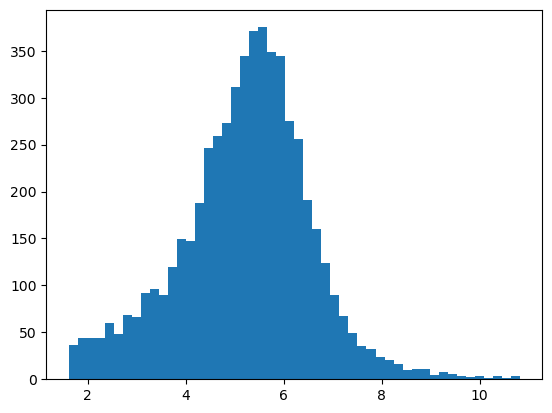

In [224]:
plt.hist(np.log(dataset['ROI'] + 100), bins = 50)
plt.show()

### Something with years?

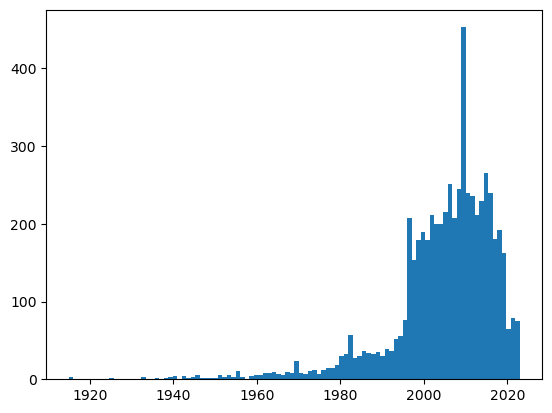

In [240]:
plt.hist(d['Year'], bins = 100)
plt.show()

## Bibliography

Banik, Rounak. “The Movies Dataset.” Kaggle, ROUNAK BANIK, 10 Nov. 2017, https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv. 

De Vany, Arthur, and W. David Walls. “Uncertainty in the Movie Industry: Does Star Power Reduce the Terror of the Box Office?” Journal of Cultural Economics, vol. 23, no. 4, Nov. 1999, pp. 285–318., https://doi.org/10.1023/a:1007608125988. 

De Vany, Arthur, and W. David Walls. “Bose-Einstein Dynamics and Adaptive Contracting in the Motion Picture Industry.” The Economic Journal, vol. 106, no. 439, 1996, pp. 1493–514. JSTOR, https://doi.org/10.2307/2235197. Accessed 6 Mar. 2023.

Walls, W. David. “Modeling Movie Success When 'Nobody Knows Anything': Conditional Stable-Distribution Analysis of Film Returns - Journal of Cultural Economics.” SpringerLink, Kluwer Academic Publishers, https://link.springer.com/article/10.1007/s10824-005-1156-5. 

### Github link
https://github.com/kongwei981126/Movie-Industry/tree/Wei